In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('covid-19(India).csv')
#df['Date']=pd.to_datetime(df.Date)
#df.sort_values(by='Date')
data=df.groupby(['Date'], sort=False)['Infected'].agg(np.sum).reset_index()
data['confirmed']=data['Infected'].cumsum()
data

,Date,Infected,confirmed
0,03-02-2020,3,3
1,02-03-2020,2,5
2,03-03-2020,2,7
3,04-03-2020,20,27
4,05-03-2020,1,28
5,06-03-2020,2,30
6,07-03-2020,3,33
7,08-03-2020,5,38
8,09-03-2020,7,45
9,10-03-2020,11,56


In [3]:
data['days']=np.arange(0, len(data), 1)
data=data[['days', 'confirmed']]
data

,days,confirmed
0,0,3
1,1,5
2,2,7
3,3,27
4,4,28
5,5,30
6,6,33
7,7,38
8,8,45
9,9,56


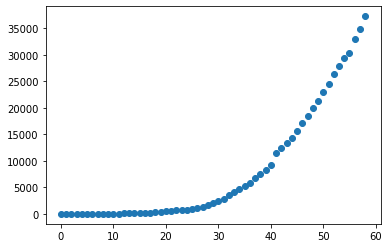

In [4]:

plt.scatter(data['days'], data['confirmed'])


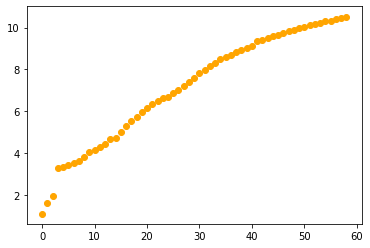

In [5]:
plt.scatter(data['days'], np.log(data['confirmed']), color='orange')

In [6]:
X, Y=np.array(data['days']).reshape(-1, 1), np.array(np.log(data['confirmed'])).reshape(-1, 1)
reg=LinearRegression()
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

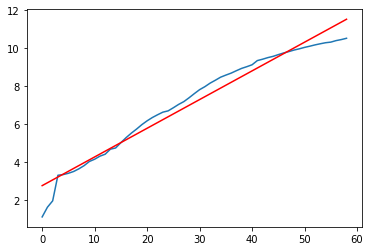

In [7]:
plt.plot(X, Y)
Y_pred=reg.predict(X)
prediction_space= ([min(X), max(X)])
plt.plot(prediction_space, [min(Y_pred), max(Y_pred)], color='red')

m=(max(Y_pred)-min(Y_pred))/(max(X)-min(X))

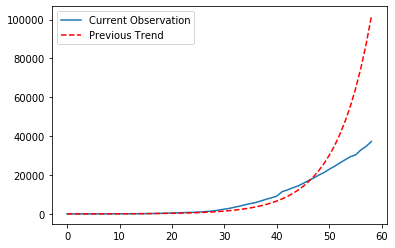

In [8]:
plt.plot(data['days'], data['confirmed'], label='Current Observation')
Y_pred=np.exp(reg.predict(X))
plt.plot(X, Y_pred, color='red', linestyle='dashed', label='Previous Trend')
plt.legend()

In [9]:
test=np.arange(len(data), len(data)+21, 1)
reg.score(X, Y)

0.9636314019950678

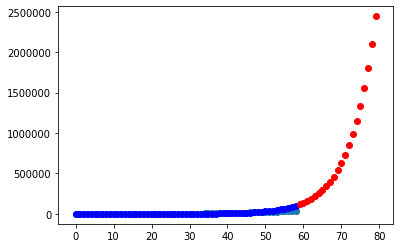

In [10]:
plt.scatter(data['days'], data['confirmed'])
Y_pred=np.exp(reg.predict(X))
plt.scatter(X, Y_pred, color='blue')
plt.scatter(test, np.exp(reg.predict(test.reshape(-1, 1))), color='red')

In [11]:
future=np.arange(len(data), len(data)+21, 1)
predictions=np.exp(reg.predict(future.reshape(-1, 1)))
future, predictions

(array([59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
        76, 77, 78, 79]),
 array([[ 118343.77450182],
        [ 137686.32718537],
        [ 160190.29960469],
        [ 186372.40612057],
        [ 216833.81483701],
        [ 252273.95103949],
        [ 293506.55671909],
        [ 341478.37492588],
        [ 397290.88796343],
        [ 462225.60855584],
        [ 537773.50469836],
        [ 625669.23381662],
        [ 727930.97228592],
        [ 846906.75483721],
        [ 985328.38785045],
        [1146374.17443976],
        [1333741.89156307],
        [1551733.69478562],
        [1805354.90019823],
        [2100428.91162459],
        [2443730.9319647 ]]))

In [12]:
dt=df.groupby(['Date'], sort=False)['Infected'].agg(np.sum).reset_index()
dt['confirmed']=dt['Infected'].cumsum()
#dt=dt.iloc[4:]
dt

,Date,Infected,confirmed
0,03-02-2020,3,3
1,02-03-2020,2,5
2,03-03-2020,2,7
3,04-03-2020,20,27
4,05-03-2020,1,28
5,06-03-2020,2,30
6,07-03-2020,3,33
7,08-03-2020,5,38
8,09-03-2020,7,45
9,10-03-2020,11,56


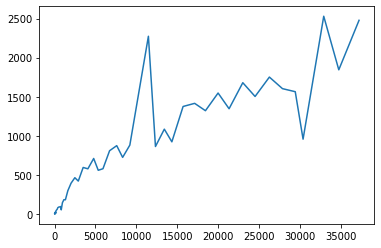

In [13]:
plt.plot(dt['confirmed'],dt['Infected'])

In [14]:
m

array([0.15138437])

In [15]:
1.0+m*14+m**2*24

array([3.66939473])